In [1]:
%pylab inline
from subprocess import call
import os.path

Populating the interactive namespace from numpy and matplotlib


In [7]:
#Numeros
num_tau=5
num_vmax=11
num_x=400

#Declaro arreglos
arreglo_tau = zeros(num_tau)
arreglo_vmax = zeros(num_vmax)
angulo = 0

#Lleno arreglos
for i in range(5,10):
    arreglo_tau[i-5]=10**i
    
for i in range(0,11):
    arreglo_vmax[i]=100*i

In [4]:
#Genero data
data_path = "./data"
for vmax in arreglo_vmax:
    for tau in arreglo_tau:
        fileout = "%s/t%dv%da%d.dat"%(data_path, int(log10(tau)), int(vmax), angulo)
        if( not os.path.exists(fileout)):
            command = "./analytic_solution.x %f %f %f > %s"%(tau, vmax, angulo, fileout)
            retcode = call(command,shell=True)

In [8]:
espectros = zeros((num_x, num_vmax, num_tau))
x_center_analytic = zeros(400)
v_th=12.4
i_th=100

for j in arange(num_tau): 
    for i in arange(num_vmax):
    
        vmax=int(arreglo_vmax[i])
        logtau=int(log10(arreglo_tau[j]))
        
        filein = "%s/t%dv%da%d"%(data_path, logtau, vmax, angulo)
        
        data = loadtxt(filein+".dat")
        espectros[:,i,j] = data[:,1]
        x_center_analytic = data[:,0]
        delta_x = x_center_analytic[1] - x_center_analytic[0]
        norm_constant = sum(espectros[:,i,j]*delta_x)
        espectros[:,i,j] = data[:,1]/norm_constant
        
        fig=figure()
        ax = axes()
        ax.set_xlabel("$\mathrm{v\ [km\ s^{-1}]}$")
        ax.set_ylabel("$\mathrm{flux\ [arbitrary\ units]}$")
        plot(x_center_analytic*v_th, espectros[:,i,j]*i_th, color="black")
        savefig(filein + ".png",format = 'png')
        close()

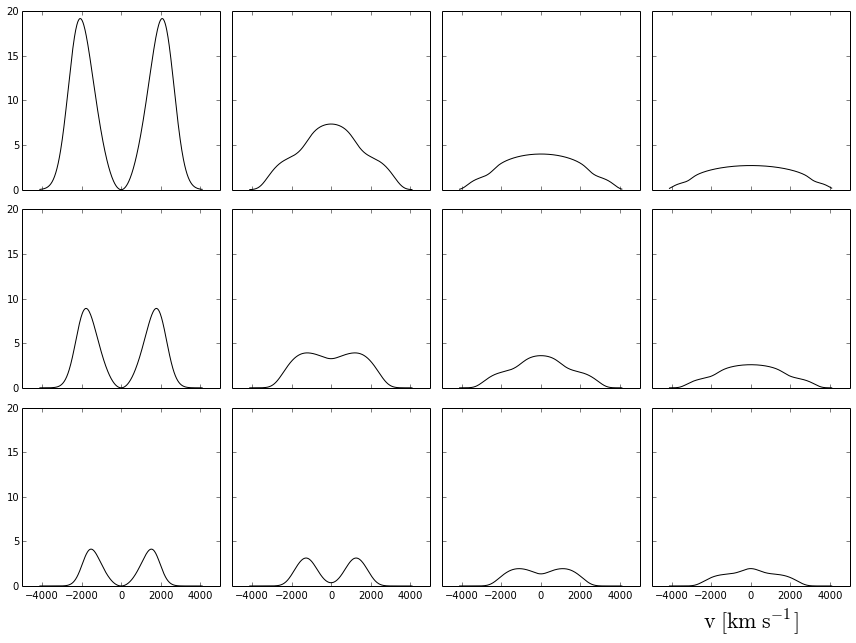

In [11]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True)
fig.set_size_inches(12,9)
xlabel("$\mathrm{v\ [km\ s^{-1}]}$", fontsize=22)
#ylabel("$\mathrm{flux\ [arbitrary\ units]}$")

ax1.plot(x_center_analytic*v_th, espectros[:,0,0]*i_th, color="black")
ax2.plot(x_center_analytic*v_th, espectros[:,1,0]*i_th, color="black")
ax3.plot(x_center_analytic*v_th, espectros[:,2,0]*i_th, color="black")
ax4.plot(x_center_analytic*v_th, espectros[:,3,0]*i_th, color="black")
ax5.plot(x_center_analytic*v_th, espectros[:,0,1]*i_th, color="black")
ax6.plot(x_center_analytic*v_th, espectros[:,1,1]*i_th, color="black")
ax7.plot(x_center_analytic*v_th, espectros[:,2,1]*i_th, color="black")
ax8.plot(x_center_analytic*v_th, espectros[:,3,1]*i_th, color="black")
ax9.plot(x_center_analytic*v_th, espectros[:,0,2]*i_th, color="black")
ax10.plot(x_center_analytic*v_th, espectros[:,1,2]*i_th, color="black")
ax11.plot(x_center_analytic*v_th, espectros[:,2,2]*i_th, color="black")
ax12.plot(x_center_analytic*v_th, espectros[:,3,2]*i_th, color="black")

tight_layout()
savefig("analytic.png",format = 'png')
show()
close()